In [433]:
!echo Python Version:
!python --version

Python Version:
Python 3.13.5


## Sessional-09: Data Preprocessing (Part 1) with Iris Dataset

-- [Tanvir Anjom Siddique](tanvirsweb.github.io)


- **Handling Missing Values:** Use SimpleImputer for mean imputation.
- **Encoding Categorical Variables:** Use LabelEncoder or OneHotEncoder.
- **Scaling Features:** Normalize numerical features using StandardScaler.
- **Splitting Data:** Use train_test_split to divide into training and testing sets.
- **Removing Outliers:** Use Z-scores to detect and remove outliers.


In [434]:
# 1. Importing Required Libraries
import numpy as np

## Loading the Iris Dataset


In [435]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print("iris.target =", iris.target)
display(df.head())


iris.target = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Map target integers to species names for better readability


In [436]:
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Problems and Solutions


# Problem 1: Handling Missing Values

Task: Identify and handle missing values in the Iris dataset.


In [437]:
# Solution: The Iris dataset does not have missing values, but let’s simulate this for the exercise:
df.loc[5:10, 'sepal length (cm)'] = np.nan

df.head(12)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,NaN,3.9,1.7,0.4,setosa
6,NaN,3.4,1.4,0.3,setosa
7,NaN,3.4,1.5,0.2,setosa
8,NaN,2.9,1.4,0.2,setosa
9,NaN,3.1,1.5,0.1,setosa


### Check for missing values


In [438]:
display(df.isnull().sum())

sepal length (cm)    6
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### Fill missing values with mean (for numerical columns)


In [439]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['sepal length (cm)']] = imputer.fit_transform(df[['sepal length (cm)']])

# Problem 2: Encoding Categorical Variables


In [440]:

#Task: Convert categorical variables (species) into numerical format.
# Solution:
# Label Encoding:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
display(df.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Label Encoding in Different ways


In [441]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example dataset
df = pd.DataFrame({
    'species': ['setosa', 'versicolor', 'virginica', 'setosa', 'virginica']
})
print("Original DataFrame:")
print(df)


Original DataFrame:
      species
0      setosa
1  versicolor
2   virginica
3      setosa
4   virginica


### 1. Basic Label Encoding on a Single Column


In [442]:
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])
print("\nAfter Label Encoding (single column):")
display(df)


After Label Encoding (single column):


,species,species_encoded
0,setosa,0
1,versicolor,1
2,virginica,2
3,setosa,0
4,virginica,2


### 2. Inverse Transform (Decode back to original labels)


In [443]:
decoded_species = label_encoder.inverse_transform(df['species_encoded'])
print("\nDecoded back to original labels:")
display(decoded_species)


Decoded back to original labels:


array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica'],
      dtype=object)

### 3. Using .map() with a Dictionary (Manual Label Encoding)


In [444]:
for j in [10,20,30] :
    print(j)

10
20
30


In [445]:
for i,j in enumerate([10,20,30]):
    print(i,j)

0 10
1 20
2 30


In [446]:
mapping = {label: idx for idx, label in enumerate(df['species'].unique())}
df['species_mapped'] = df['species'].map(mapping)
# df['species'].map({"cat_value":"Numerical_Value", "cat_value2":"Numerical_Value2"})
print("\nLabel Encoding using map():")
display(df)


Label Encoding using map():


,species,species_encoded,species_mapped
0,setosa,0,0
1,versicolor,1,1
2,virginica,2,2
3,setosa,0,0
4,virginica,2,2


### 4. Apply Label Encoding on Multiple Categorical Columns


In [447]:
# Example with multiple categorical columns
df_multi = pd.DataFrame({
    'species': ['setosa', 'versicolor', 'virginica'],
    'color': ['red', 'green', 'blue']
})

for col in df_multi.select_dtypes(include=['object']).columns:
    df_multi[col] = LabelEncoder().fit_transform(df_multi[col])

print("\nAfter Label Encoding multiple columns:")
print(df_multi)



After Label Encoding multiple columns:
   species  color
0        0      2
1        1      1
2        2      0


### 5. Using .apply() for Multiple Columns


In [448]:
df_multi2 = pd.DataFrame({
    'species': ['setosa', 'versicolor', 'virginica'],
    'color': ['red', 'green', 'blue']
})

df_multi2 = df_multi2.apply(LabelEncoder().fit_transform)
print("\nApply LabelEncoder on all categorical columns at once:")
display(df_multi2)


Apply LabelEncoder on all categorical columns at once:


,species,color
0,0,2
1,1,1
2,2,0


### 6. Using fit() and transform() Separately


- fit() → Finds unique labels.

- transform() → Converts categories into numbers.

- Useful when training & test datasets must follow the same mapping.


In [449]:
label_encoder = LabelEncoder()
label_encoder.fit(df['species'])
df['species_encoded2'] = label_encoder.transform(df['species'])
print("\nFit & Transform separately:")
display(df)


Fit & Transform separately:


,species,species_encoded,species_mapped,species_encoded2
0,setosa,0,0,0
1,versicolor,1,1,1
2,virginica,2,2,2
3,setosa,0,0,0
4,virginica,2,2,2


# Problem 3: Scaling Features


In [450]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print("iris.target =", iris.target)
display(df.head())

iris.target = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [451]:
# Task: Normalize or standardize numerical features.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
# display(scaled_features)

df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = scaled_features
display(df.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [452]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer
import pandas as pd

# Features to scale
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[features]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### 1️⃣ Standardization (zero mean, unit variance)


In [453]:
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)
df_standard = pd.DataFrame(X_standard, columns=[f"{col}_standard" for col in features])
df_standard.head()

,sepal length (cm)_standard,sepal width (cm)_standard,petal length (cm)_standard,petal width (cm)_standard
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### 2️⃣ Min-Max Normalization (scale to [0, 1])


In [454]:
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
df_minmax = pd.DataFrame(X_minmax, columns=[f"{col}_minmax" for col in features])
df_minmax.head()

,sepal length (cm)_minmax,sepal width (cm)_minmax,petal length (cm)_minmax,petal width (cm)_minmax
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


### 3️⃣ Robust Scaling (less sensitive to outliers, uses median & IQR)


In [455]:
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)
df_robust = pd.DataFrame(X_robust, columns=[f"{col}_robust" for col in features])
df_robust.head()


,sepal length (cm)_robust,sepal width (cm)_robust,petal length (cm)_robust,petal width (cm)_robust
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333


### 4️⃣ Max-Abs Scaling (scale by max absolute value → good for sparse data)


In [456]:
maxabs_scaler = MaxAbsScaler()
X_maxabs = maxabs_scaler.fit_transform(X)
df_maxabs = pd.DataFrame(X_maxabs, columns=[f"{col}_maxabs" for col in features])
df_maxabs.head()


,sepal length (cm)_maxabs,sepal width (cm)_maxabs,petal length (cm)_maxabs,petal width (cm)_maxabs
0,-0.361426,0.329692,-0.750477,-0.768324
1,-0.458671,-0.042701,-0.750477,-0.768324
2,-0.555916,0.106256,-0.782304,-0.768324
3,-0.604538,0.031778,-0.718651,-0.768324
4,-0.410049,0.404171,-0.750477,-0.768324


### 5️⃣ L2 Normalization (row-wise scaling so each sample has unit norm)


In [457]:
normalizer = Normalizer(norm='l2')
X_normalized = normalizer.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=[f"{col}_normalized" for col in features])
df_normalized.head()

,sepal length (cm)_normalized,sepal width (cm)_normalized,petal length (cm)_normalized,petal width (cm)_normalized
0,-0.388449,0.439479,-0.578017,-0.567329
1,-0.518990,-0.059926,-0.608534,-0.597281
2,-0.579791,0.137446,-0.584692,-0.550533
3,-0.633421,0.041296,-0.539604,-0.553082
4,-0.412678,0.504495,-0.541256,-0.531247


In [458]:
# Combine all results for comparison
df_scaled = pd.concat([df, df_standard, df_minmax, df_robust, df_maxabs, df_normalized], axis=1)

display(df_scaled.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,sepal length (cm)_standard,sepal width (cm)_standard,petal length (cm)_standard,petal width (cm)_standard,sepal length (cm)_minmax,...,petal length (cm)_robust,petal width (cm)_robust,sepal length (cm)_maxabs,sepal width (cm)_maxabs,petal length (cm)_maxabs,petal width (cm)_maxabs,sepal length (cm)_normalized,sepal width (cm)_normalized,petal length (cm)_normalized,petal width (cm)_normalized
0,-0.900681,1.019004,-1.340227,-1.315444,0,-0.900681,1.019004,-1.340227,-1.315444,0.222222,...,-0.842857,-0.733333,-0.361426,0.329692,-0.750477,-0.768324,-0.388449,0.439479,-0.578017,-0.567329
1,-1.143017,-0.131979,-1.340227,-1.315444,0,-1.143017,-0.131979,-1.340227,-1.315444,0.166667,...,-0.842857,-0.733333,-0.458671,-0.042701,-0.750477,-0.768324,-0.518990,-0.059926,-0.608534,-0.597281
2,-1.385353,0.328414,-1.397064,-1.315444,0,-1.385353,0.328414,-1.397064,-1.315444,0.111111,...,-0.871429,-0.733333,-0.555916,0.106256,-0.782304,-0.768324,-0.579791,0.137446,-0.584692,-0.550533
3,-1.506521,0.098217,-1.283389,-1.315444,0,-1.506521,0.098217,-1.283389,-1.315444,0.083333,...,-0.814286,-0.733333,-0.604538,0.031778,-0.718651,-0.768324,-0.633421,0.041296,-0.539604,-0.553082
4,-1.021849,1.249201,-1.340227,-1.315444,0,-1.021849,1.249201,-1.340227,-1.315444,0.194444,...,-0.842857,-0.733333,-0.410049,0.404171,-0.750477,-0.768324,-0.412678,0.504495,-0.541256,-0.531247


## ⚖️ Scaling / Normalization Cheat Sheet

Quick reference for when to use which scaler, with formulas and scikit-learn code.

<table>
  <thead>
    <tr>
      <th>Scaler / Normalizer</th>
      <th>Formula</th>
      <th>When to Use</th>
      <th>scikit-learn Code</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>StandardScaler</b> <span style="color:gray;">(standardization)</span></td>
      <td> z = (x − μ) / σ  </td>
      <td>Features roughly Gaussian; common for SVM, Logistic/Linear Regression, PCA.</td>
      <td>

```python
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
```

  </td>
</tr>

<tr>
  <td><b>MinMaxScaler</b> <span style="color:gray;">([0,1] range)</span></td>
  <td> x' = (x − x<sub>min</sub>) / (x<sub>max</sub> − x<sub>min</sub>) ∈ [0,1] </td>
  <td>Need bounded features (NNs, KNN, distance-based). Sensitive to outliers.</td>
  <td>

```python
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)
```

  </td>
</tr>

<tr>
  <td><b>RobustScaler</b> <span style="color:gray;">(outlier-robust)</span></td>
  <td> x' = (x − median(x)) / IQR(x), where IQR = Q<sub>3</sub> − Q<sub>1</sub> </td>
  <td>Heavy outliers; uses median and IQR instead of mean/std.</td>
  <td>

```python
from sklearn.preprocessing import RobustScaler
X_scaled = RobustScaler().fit_transform(X)
```

  </td>
</tr>

<tr>
  <td><b>MaxAbsScaler</b> <span style="color:gray;">(sparse-friendly)</span></td>
  <td> x' = x / max(|x|) ∈ [−1,1] </td>
  <td>Sparse data (many zeros); preserves sparsity and sign.</td>
  <td>

```python
from sklearn.preprocessing import MaxAbsScaler
X_scaled = MaxAbsScaler().fit_transform(X)
```

  </td>
</tr>

<tr>
  <td><b>Normalizer (L2)</b> <span style="color:gray;">(row-wise)</span></td>
  <td> x' = x / √(Σ x<sub>i</sub><sup>2</sup>) </td>
  <td>Make each sample a unit vector (cosine similarity, text/NLP, clustering).</td>
  <td>

```python
from sklearn.preprocessing import Normalizer
X_scaled = Normalizer(norm='l2').fit_transform(X)
```

  </td>
</tr>

<tr>
  <td><b>Normalizer (L1)</b> <span style="color:gray;">(row-wise)</span></td>
  <td> x' = x / Σ |x<sub>i</sub>| </td>
  <td>Row normalization less affected by large coordinates; good for sparse features.</td>
  <td>

```python
from sklearn.preprocessing import Normalizer
X_scaled = Normalizer(norm='l1').fit_transform(X)
```

  </td>
</tr>

  </tbody>
</table>

For mixed DataFrames, select only numeric columns before scaling:

```python
X = df.select_dtypes(include=['number'])
```


### One-Hot Encoding:


In [459]:
df_O = pd.DataFrame({
    'species': ['setosa', 'versicolor', 'virginica']
})
display(df_O)

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_features = one_hot_encoder.fit_transform( df_O[['species']] )
df_encoded = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(['species']))
display(df_encoded)

,species
0,setosa
1,versicolor
2,virginica


,species_setosa,species_versicolor,species_virginica
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [460]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_features = one_hot_encoder.fit_transform( df[['species']] )
display(encoded_features)
# Convert to DataFrame and concatenate with original
df_encoded = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(['species']))
df = pd.concat([df, df_encoded], axis=1)
df.drop(['species'], axis=1, inplace=True)
display(df.head())

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_0,species_1,species_2
0,-0.900681,1.019004,-1.340227,-1.315444,1.0,0.0,0.0
1,-1.143017,-0.131979,-1.340227,-1.315444,1.0,0.0,0.0
2,-1.385353,0.328414,-1.397064,-1.315444,1.0,0.0,0.0
3,-1.506521,0.098217,-1.283389,-1.315444,1.0,0.0,0.0
4,-1.021849,1.249201,-1.340227,-1.315444,1.0,0.0,0.0


# Problem 4: Removing Outliers


### 1. Z-Score Method


In [461]:
# # Load the Iris dataset
# iris = load_iris()
# df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# df['species'] = iris.target

# print("iris.target =", iris.target)
# display(df.head())

In [462]:
import numpy as np
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]))

# Remove rows with any Z-score > 3
# Keep only rows with Z-Score <3
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("After Z-score filtering dataframe shape:", df_no_outliers.shape)


After Z-score filtering dataframe shape: (149, 7)


### 2. IQR Method (Interquartile Range)


In [463]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Keep only data within 1.5*IQR
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("After IQR filtering:", df_iqr.shape)

After IQR filtering: (146, 7)


### 3. Percentile / Winsorization (Cap Outliers)


In [464]:
from scipy.stats.mstats import winsorize

# Winsorize numeric columns: limit top and bottom 5%
df_winsorized = df.copy()
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for col in cols:
    df_winsorized[col] = winsorize(df[col], limits=[0.05, 0.05])
print("After Winsorization:")
display(df_winsorized.head())

After Winsorization:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_0,species_1,species_2
0,-0.900681,1.019004,-1.340227,-1.315444,1.0,0.0,0.0
1,-1.143017,-0.131979,-1.340227,-1.315444,1.0,0.0,0.0
2,-1.385353,0.328414,-1.397064,-1.315444,1.0,0.0,0.0
3,-1.506521,0.098217,-1.283389,-1.315444,1.0,0.0,0.0
4,-1.021849,1.249201,-1.340227,-1.315444,1.0,0.0,0.0


### 4. Manual Thresholding


In [465]:
# Example: remove rows where sepal length > 8 or petal width < 0.1
df_manual = df[(df['sepal length (cm)'] <= 8) & (df['petal width (cm)'] >= 0.1)]
print("After manual thresholding:", df_manual.shape)

After manual thresholding: (85, 7)


### 5. Boxplot Method (Using Pandas)


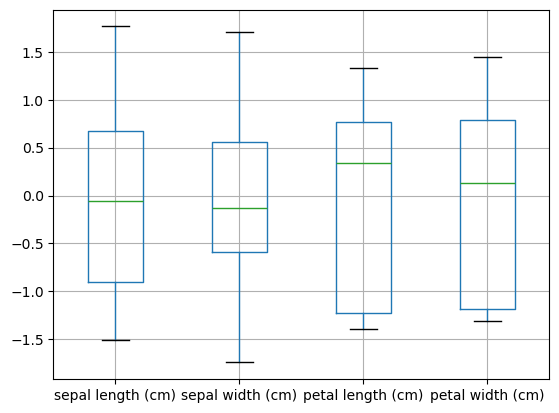

In [466]:
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

### 6. Using RobustScaler to Reduce Outlier Influence (Optional)


In [467]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = df.copy()
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df_scaled[cols] = scaler.fit_transform(df[cols])
display(df_scaled.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_0,species_1,species_2
0,-0.538462,1.0,-0.842857,-0.733333,1.0,0.0,0.0
1,-0.692308,0.0,-0.842857,-0.733333,1.0,0.0,0.0
2,-0.846154,0.4,-0.871429,-0.733333,1.0,0.0,0.0
3,-0.923077,0.2,-0.814286,-0.733333,1.0,0.0,0.0
4,-0.615385,1.2,-0.842857,-0.733333,1.0,0.0,0.0


<table>
  <thead>
    <tr>
      <th>Method</th>
      <th>Logic / Formula</th>
      <th>Use Case</th>
      <th>Pros</th>
      <th>Cons</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Z-Score</td>
      <td>z = (x - mean) / std; Remove points with |z| &gt; 3</td>
      <td>Data roughly normal, remove extreme deviations</td>
      <td>Simple, fast, widely used</td>
      <td>Not robust to non-normal/skewed data</td>
    </tr>
    <tr>
      <td>IQR Method</td>
      <td>IQR = Q3 - Q1; Remove x &lt; Q1-1.5*IQR or x &gt; Q3+1.5*IQR</td>
      <td>Skewed or non-normal data</td>
      <td>Robust to skew, simple to compute</td>
      <td>May remove too many points in small datasets</td>
    </tr>
    <tr>
      <td>Percentile / Winsorization</td>
      <td>Cap values at top/bottom percentiles (e.g., 5% & 95%)</td>
      <td>Preserve dataset size, limit effect of extremes</td>
      <td>Keeps dataset size; reduces influence of extreme values</td>
      <td>Changes actual values; not true removal</td>
    </tr>
    <tr>
      <td>Manual Thresholding</td>
      <td>Define min/max limits based on domain knowledge</td>
      <td>When domain knowledge exists for valid ranges</td>
      <td>Flexible and explicit control</td>
      <td>Requires expert knowledge; arbitrary thresholds</td>
    </tr>
    <tr>
      <td>Boxplot Visualization</td>
      <td>Use quartiles &amp; whiskers to visualize extreme points</td>
      <td>Exploratory data analysis</td>
      <td>Easy visual identification</td>
      <td>Not automatic; subjective</td>
    </tr>
    <tr>
      <td>RobustScaler</td>
      <td>x_scaled = (x - median) / IQR</td>
      <td>Scale features while reducing outlier influence</td>
      <td>Reduces outlier effect; useful for ML scaling</td>
      <td>Does not remove outliers; only rescales</td>
    </tr>
  </tbody>
</table>


# Problem 5: Splitting Data into Training and Testing Sets


### 1. Basic Train-Test Split


In [468]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['species_0', 'species_1', 'species_2'], axis=1)
y = df[['species_0', 'species_1', 'species_2']]

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (120, 4), Test set shape: (30, 4)


### 2. Split with Stratification


In [469]:
# Stratified split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### 3. Split with Different Ratios


In [470]:
# 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)
# 0.1765 ~ 0.15 / 0.85 to get final 15% validation

### 4. Split Without Shuffling


In [471]:
# Useful for time series or ordered data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

### 5. Using Numpy Indexing (Manual Split)


In [472]:
import numpy as np
n = len(df)
train_size = int(n * 0.8)

# Features and target arrays
X_array = X.values
y_array = y.values

# Split manually
X_train = X_array[:train_size]
X_test = X_array[train_size:]
y_train = y_array[:train_size]
y_test = y_array[train_size:]

### 6. K-Fold Cross Validation Split


In [473]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"Fold {fold+1} - Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Fold 1 - Train shape: (120, 4), Test shape: (30, 4)
Fold 2 - Train shape: (120, 4), Test shape: (30, 4)
Fold 3 - Train shape: (120, 4), Test shape: (30, 4)
Fold 4 - Train shape: (120, 4), Test shape: (30, 4)
Fold 5 - Train shape: (120, 4), Test shape: (30, 4)


### 7. Stratified K-Fold (For Classification)


In [474]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X, y.idxmax(axis=1))):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"Fold {fold+1} - Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Fold 1 - Train shape: (120, 4), Test shape: (30, 4)
Fold 2 - Train shape: (120, 4), Test shape: (30, 4)
Fold 3 - Train shape: (120, 4), Test shape: (30, 4)
Fold 4 - Train shape: (120, 4), Test shape: (30, 4)
Fold 5 - Train shape: (120, 4), Test shape: (30, 4)


# END
